# Initial Model Creation

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

## Creation of Dataset 

In [2]:
def compareIrisLandmarks(irisLandmarks, eyeLandmarks, eyeAnchors):
    deltaVals = []
    for i in range(0, len(irisLandmarks), 3):
        x = irisLandmarks[i]
        y = irisLandmarks[i+1]
        z = irisLandmarks[i+2]
        
        #compare to 
        for j in range(0, len(eyeLandmarks), 3):
            x_c = eyeLandmarks[j]
            y_c = eyeLandmarks[j+1]
            z_c = eyeLandmarks[j+2]
            
            deltaVals.append(x - x_c)
            deltaVals.append(y - y_c)
            deltaVals.append(z - z_c)
        
        for j in range(0, len(eyeAnchors), 3):
            x_c = eyeLandmarks[j]
            y_c = eyeLandmarks[j+1]
            z_c = eyeLandmarks[j+2]
            
            deltaVals.append(x - x_c)
            deltaVals.append(y - y_c)
            deltaVals.append(z - z_c)
    return deltaVals

In [3]:
def create_df(state, filename):
    df = pd.read_csv(filename)
    asNumpyArray = df.to_numpy()
    changedRows = []
    headers = []
    for res in asNumpyArray:
        newRow = compareIrisLandmarks(res[15:30], res[81:108], res[132:138]) + compareIrisLandmarks(res[0:15], res[30:57], res[138:])
        changedRows.append(newRow)
    
    for i in range(len(changedRows[0])):
        headers.append(i)
    
    df = pd.DataFrame(changedRows, columns = headers)
    df['state'] = state
    return df

In [2]:
def create_df(state, filename):
    df = pd.read_csv(filename)
    df['state'] = state
    return df

In [3]:
eyes_down = ['data_0/down.csv','data_1/down.csv', 'data_2/down.csv', 'data_3/down.csv', 'data_4/down.csv', 'data_5/down.csv']
eyes_centre = ['data_0/up.csv', 'data_5/up.csv', 'data_0/centre.csv', 'data_1/centre.csv', 'data_0/up.csv', 'data_5/up.csv', 'data_2/centre.csv', 'data_3/centre.csv', 'data_4/centre.csv', 'data_5/centre.csv']
eyes_right = ['data_0/right.csv', 'data_1/right.csv', 'data_2/right.csv', 'data_3/right.csv', 'data_4/right.csv', 'data_5/right.csv']
eyes_left = ['data_0/left.csv', 'data_1/left.csv', 'data_2/left.csv', 'data_3/left.csv', 'data_4/left.csv', 'data_5/left.csv']

In [4]:
stated_dfs = []
    
for csv in eyes_down:
    stated_dfs.append(create_df(0, "iris_state_training_data/{}".format(csv)))
    
for csv in eyes_centre:
    stated_dfs.append(create_df(1, "iris_state_training_data/{}".format(csv)))
    
for csv in eyes_right:
    stated_dfs.append(create_df(2, "iris_state_training_data/{}".format(csv)))
    
for csv in eyes_left:
    stated_dfs.append(create_df(3, "iris_state_training_data/{}".format(csv)))


## Put it all together

In [5]:
all_data = pd.concat(stated_dfs)

In [6]:
all_data['state'] = all_data['state'].astype('int')
y = np.asarray(all_data['state'])
y [0:4]

array([0, 0, 0, 0])

In [7]:
just_x_df = all_data.drop('state', axis = 1)

In [8]:
just_x_df.head()

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,z44,x45,y45,z45,x46,y46,z46,x47,y47,z47
0,0.547861,0.457255,0.037522,0.539726,0.456115,0.037549,0.548240,0.443716,0.038648,0.556108,...,0.009760,0.475979,0.461406,0.002749,0.573269,0.448141,0.013217,0.531841,0.454544,0.004325
1,0.547212,0.457804,0.033012,0.538917,0.456309,0.033071,0.547767,0.444287,0.034250,0.555587,...,0.010087,0.477221,0.462906,0.003047,0.573309,0.449144,0.013856,0.531691,0.456042,0.004782
2,0.546569,0.458168,0.064143,0.538594,0.457120,0.064135,0.546906,0.444920,0.065417,0.554616,...,0.010846,0.476816,0.463298,0.004002,0.573181,0.449647,0.015499,0.531752,0.456706,0.006140
3,0.546438,0.457669,0.048158,0.538263,0.456553,0.048061,0.546808,0.444128,0.049204,0.554693,...,0.011660,0.476289,0.462975,0.004545,0.573289,0.449302,0.015583,0.531638,0.456402,0.006367
4,0.547827,0.458588,0.083088,0.539671,0.457002,0.083304,0.548475,0.445369,0.084560,0.555954,...,0.010839,0.476809,0.463423,0.003919,0.573025,0.449886,0.015402,0.531637,0.456787,0.006024


In [9]:
X = np.asarray(just_x_df)
X[0:4]

array([[ 5.47860730e-01,  4.57255342e-01,  3.75221521e-02,
         5.39726087e-01,  4.56115426e-01,  3.75489257e-02,
         5.48239723e-01,  4.43715911e-01,  3.86483669e-02,
         5.56107605e-01,  4.58147441e-01,  3.79975997e-02,
         5.47490367e-01,  4.70701991e-01,  3.75443175e-02,
         4.60971415e-01,  4.69821909e-01,  8.25592875e-02,
         4.68682510e-01,  4.68412187e-01,  8.24532956e-02,
         4.60435605e-01,  4.57004627e-01,  8.29553828e-02,
         4.53064623e-01,  4.71049394e-01,  8.25170130e-02,
         4.61444157e-01,  4.82566028e-01,  8.24683532e-02,
         5.70184296e-01,  4.52072022e-01,  9.27231386e-02,
         5.67167610e-01,  4.55794515e-01,  6.48137555e-02,
         5.63650149e-01,  4.58521599e-01,  4.15811911e-02,
         5.58742690e-01,  4.60960865e-01,  1.49542531e-02,
         5.51418650e-01,  4.61920336e-01, -5.66738518e-03,
         5.44357362e-01,  4.59982035e-01, -1.05924467e-02,
         5.37799320e-01,  4.55916977e-01, -4.39057680e-0

In [10]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score # Accuracy metrics 
from sklearn.metrics import classification_report, confusion_matrix
import itertools


In [11]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [12]:
from sklearn.model_selection import RepeatedKFold 
kf = RepeatedKFold(n_splits=5, n_repeats=1, random_state=None) 
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}
fit_models = {}

In [13]:
for train_index, test_index in kf.split(X):
    print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]
    for algo, pipeline in pipelines.items():
        model = pipeline.fit(X_train, y_train)
        fit_models[algo] = model

Train: [   0    1    2 ... 3717 3719 3723] Validation: [  13   15   17   29   30   33   42   47   51   60   61   70   71   73
   83   84   87   89   90   91  113  124  136  141  146  152  156  161
  174  180  186  188  191  201  212  222  223  226  229  232  233  234
  237  239  246  250  251  252  253  255  258  265  266  281  282  283
  289  294  300  301  303  309  321  325  329  342  343  353  356  360
  367  371  372  376  378  382  387  390  404  405  408  416  419  420
  422  423  424  434  435  441  442  446  454  455  461  464  465  466
  472  477  481  491  493  497  499  504  514  516  517  521  522  531
  536  538  539  540  545  547  551  558  562  570  584  588  597  598
  602  603  608  615  620  623  626  630  631  638  639  640  641  653
  654  658  660  663  664  668  671  681  687  693  694  701  702  718
  721  729  730  733  736  739  749  753  763  765  768  779  780  782
  788  791  798  805  806  808  809  811  815  823  848  851  862  864
  869  875  877  880  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train: [   0    1    2 ... 3721 3722 3723] Validation: [   3    9   11   19   24   27   32   36   40   43   48   49   52   56
   58   59   72   75   77   79   81   88   93  102  104  116  122  123
  125  126  130  133  139  140  148  150  164  171  177  189  190  199
  207  210  214  219  220  231  236  238  240  241  244  247  262  263
  267  270  272  285  286  288  291  293  299  313  322  328  330  334
  340  346  351  355  365  366  369  370  375  377  380  381  384  391
  393  396  397  399  402  407  413  414  425  427  428  430  439  444
  447  457  460  476  478  480  482  483  484  486  492  507  508  512
  513  520  525  526  533  534  537  544  548  557  561  563  568  578
  579  580  587  591  595  600  607  613  619  621  622  634  637  644
  645  647  655  670  675  686  700  705  708  720  728  742  743  744
  752  771  774  783  794  797  800  814  817  819  825  827  829  833
  837  843  847  853  854  861  866  868  879  887  889  894  895  899
  900  902  908  922  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    1    2 ... 3720 3721 3722] Validation: [   5    8   10   14   23   25   26   31   39   41   45   46   53   66
   69   74   78   82   95   96  100  108  109  111  115  131  138  145
  153  154  159  162  165  166  173  176  178  182  198  202  205  209
  216  217  221  224  225  242  245  249  261  273  274  278  279  284
  290  297  302  304  311  312  314  324  332  333  335  338  347  357
  358  361  374  386  392  395  401  406  409  412  415  421  426  432
  436  438  440  452  459  462  463  468  473  502  527  530  532  535
  541  543  550  555  556  564  574  575  581  593  605  612  624  629
  633  636  643  648  649  651  656  657  659  665  676  677  679  690
  691  695  698  704  713  717  719  724  725  731  732  755  757  759
  760  761  766  770  777  778  784  790  792  793  802  804  816  828
  834  835  836  840  857  860  863  867  874  891  898  904  907  916
  917  919  929  934  935  937  939  940  945  971  988  989  990  993
  995 1002 1004 1010 1

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    3    5 ... 3721 3722 3723] Validation: [   1    2    4    7   22   28   50   57   62   63   67   68   80   97
   99  107  110  114  117  118  119  120  121  127  129  134  135  142
  149  151  155  167  170  175  179  181  183  192  193  194  195  197
  200  203  206  213  227  228  235  248  256  257  259  260  268  269
  271  276  277  287  292  295  296  316  317  323  327  344  345  349
  354  362  363  368  373  385  388  394  410  418  433  445  450  451
  456  458  469  475  485  490  495  496  500  501  506  509  510  519
  552  553  554  559  560  565  566  569  571  572  573  577  582  585
  590  592  594  596  601  604  609  614  616  627  635  646  650  652
  661  662  666  674  678  683  684  692  697  707  715  716  722  723
  726  734  735  737  738  740  745  746  747  748  750  751  754  764
  767  773  776  789  796  803  807  818  820  826  831  832  838  839
  841  849  850  852  855  856  858  870  872  883  888  896  905  914
  921  924  925  926  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   1    2    3 ... 3721 3722 3723] Validation: [   0    6   12   16   18   20   21   34   35   37   38   44   54   55
   64   65   76   85   86   92   94   98  101  103  105  106  112  128
  132  137  143  144  147  157  158  160  163  168  169  172  184  185
  187  196  204  208  211  215  218  230  243  254  264  275  280  298
  305  306  307  308  310  315  318  319  320  326  331  336  337  339
  341  348  350  352  359  364  379  383  389  398  400  403  411  417
  429  431  437  443  448  449  453  467  470  471  474  479  487  488
  489  494  498  503  505  511  515  518  523  524  528  529  542  546
  549  567  576  583  586  589  599  606  610  611  617  618  625  628
  632  642  667  669  672  673  680  682  685  688  689  696  699  703
  706  709  710  711  712  714  727  741  756  758  762  769  772  775
  781  785  786  787  795  799  801  810  812  813  821  822  824  830
  842  844  845  846  859  865  871  873  876  878  882  885  886  893
  903  909  910  911  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [14]:
fit_models

{'lr': Pipeline(memory=None,
      steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='warn',
           tol=0.0001, verbose=0, warm_start=False))]),
 'rc': Pipeline(memory=None,
      steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridgeclassifier', RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
         max_iter=None, normalize=False, random_state=None, solver='auto',
         tol=0.001))]),
 'rf': Pipeline(memory=None,
      steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='au

In [15]:
gb = {}
gb['gb'] = fit_models['gb']

lr = {}
lr['lr'] = fit_models['lr']

rc = {}
rc['rc'] = fit_models['rc']

rf = {}
rf['rf'] = fit_models['rf']

## GB Model

gb 0.9986577181208054
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00       279
           2       1.00      0.99      1.00       153
           3       1.00      1.00      1.00       158

   micro avg       1.00      1.00      1.00       745
   macro avg       1.00      1.00      1.00       745
weighted avg       1.00      1.00      1.00       745

Confusion matrix, without normalization
[[155   0   0   0]
 [  0 279   0   0]
 [  0   1 152   0]
 [  0   0   0 158]]
gb 0.9919463087248322
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       163
           1       0.98      1.00      0.99       253
           2       1.00      0.98      0.99       172
           3       1.00      0.99      1.00       157

   micro avg       0.99      0.99      0.99       745
   macro avg       0.99      0.99      0.99       745
weighted avg       0.99 

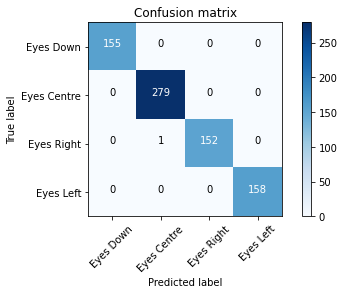

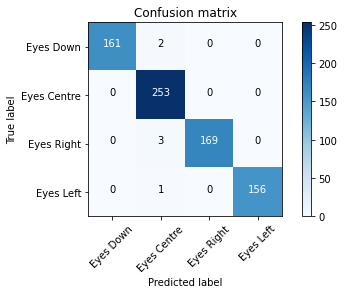

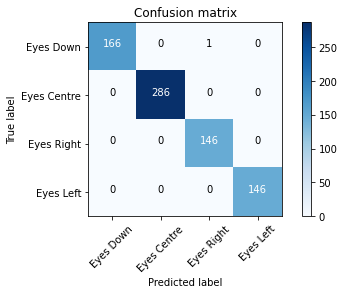

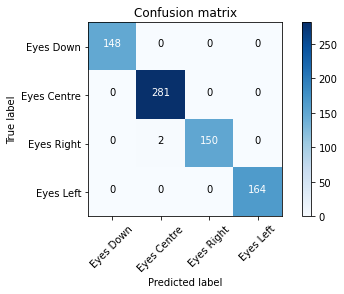

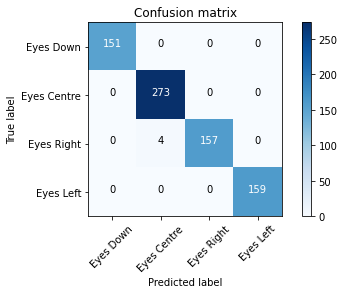

In [16]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]

    for algo, model in gb.items():
        
        yhat = model.predict(X_test)
        print(algo, accuracy_score(y_test, yhat))
        # Compute confusion matrix
        cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2,3])
        np.set_printoptions(precision=2)

        print (classification_report(y_test, yhat))

        # Plot non-normalized confusion matrix
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=['Eyes Down', 'Eyes Centre', 'Eyes Right', 'Eyes Left'],normalize= False,  title='Confusion matrix')


## LR Model

lr 0.9906040268456375
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       168
           1       1.00      0.98      0.99       270
           2       0.98      0.99      0.99       146
           3       0.99      0.99      0.99       161

   micro avg       0.99      0.99      0.99       745
   macro avg       0.99      0.99      0.99       745
weighted avg       0.99      0.99      0.99       745

Confusion matrix, without normalization
[[168   0   0   0]
 [  1 265   3   1]
 [  1   0 145   0]
 [  0   1   0 160]]
lr 0.9932885906040269
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       148
           1       1.00      0.99      0.99       273
           2       0.97      0.99      0.98       156
           3       0.99      1.00      1.00       168

   micro avg       0.99      0.99      0.99       745
   macro avg       0.99      0.99      0.99       745
weighted avg       0.99 

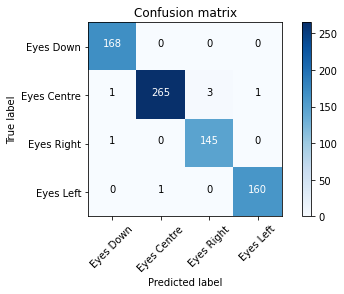

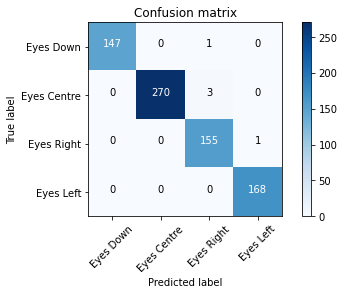

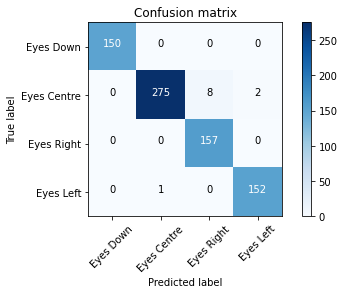

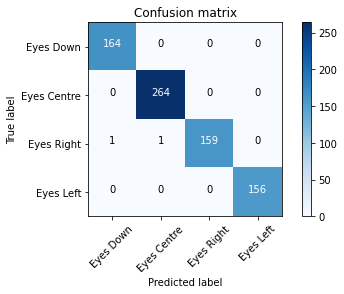

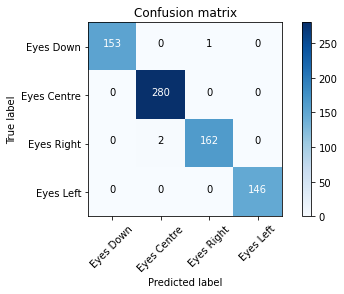

In [17]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]

    for algo, model in lr.items():
        
        yhat = model.predict(X_test)
        print(algo, accuracy_score(y_test, yhat))
        # Compute confusion matrix
        cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2,3])
        np.set_printoptions(precision=2)

        print (classification_report(y_test, yhat))

        # Plot non-normalized confusion matrix
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=['Eyes Down', 'Eyes Centre', 'Eyes Right', 'Eyes Left'],normalize= False,  title='Confusion matrix')


## RF Model

rf 0.9986577181208054
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       147
           1       1.00      1.00      1.00       287
           2       1.00      1.00      1.00       153
           3       1.00      1.00      1.00       158

   micro avg       1.00      1.00      1.00       745
   macro avg       1.00      1.00      1.00       745
weighted avg       1.00      1.00      1.00       745

Confusion matrix, without normalization
[[147   0   0   0]
 [  1 286   0   0]
 [  0   0 153   0]
 [  0   0   0 158]]
rf 0.9932885906040269
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       156
           1       0.98      1.00      0.99       274
           2       1.00      0.98      0.99       166
           3       1.00      1.00      1.00       149

   micro avg       0.99      0.99      0.99       745
   macro avg       1.00      0.99      0.99       745
weighted avg       0.99 

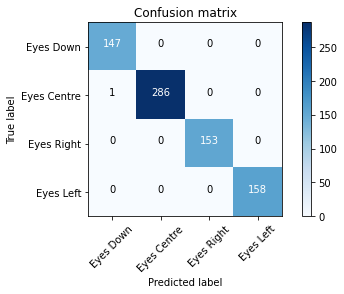

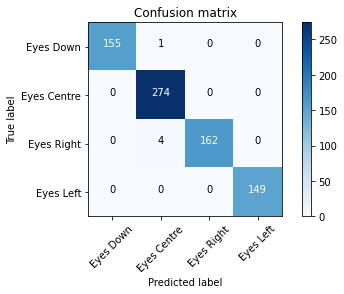

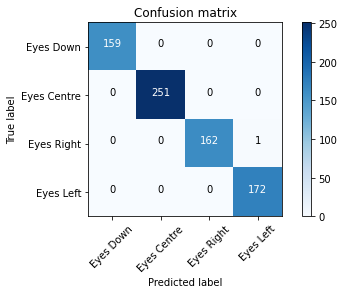

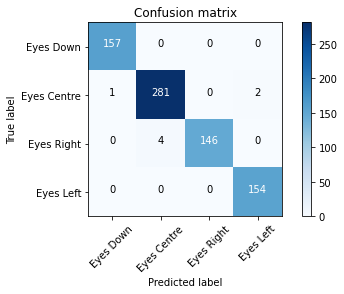

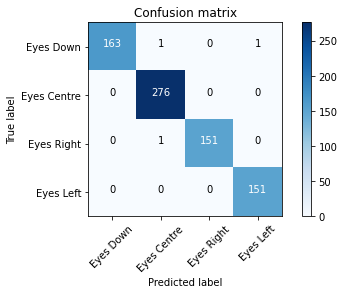

In [19]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]

    for algo, model in rf.items():
        
        yhat = model.predict(X_test)
        print(algo, accuracy_score(y_test, yhat))
        # Compute confusion matrix
        cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2,3])
        np.set_printoptions(precision=2)

        print (classification_report(y_test, yhat))

        # Plot non-normalized confusion matrix
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=['Eyes Down', 'Eyes Centre', 'Eyes Right', 'Eyes Left'],normalize= False,  title='Confusion matrix')


## RC Model

rc 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       158
           1       1.00      1.00      1.00       267
           2       1.00      1.00      1.00       148
           3       1.00      1.00      1.00       172

   micro avg       1.00      1.00      1.00       745
   macro avg       1.00      1.00      1.00       745
weighted avg       1.00      1.00      1.00       745

Confusion matrix, without normalization
[[158   0   0   0]
 [  0 267   0   0]
 [  0   0 148   0]
 [  0   0   0 172]]
rc 0.9932885906040269
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       157
           1       0.99      1.00      1.00       267
           2       1.00      0.99      1.00       151
           3       0.98      0.99      0.99       170

   micro avg       0.99      0.99      0.99       745
   macro avg       0.99      0.99      0.99       745
weighted avg       0.99      0.99      

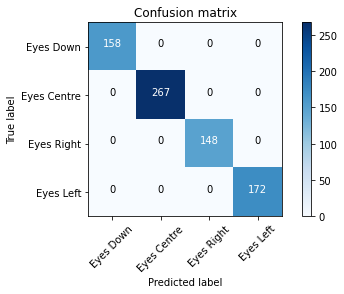

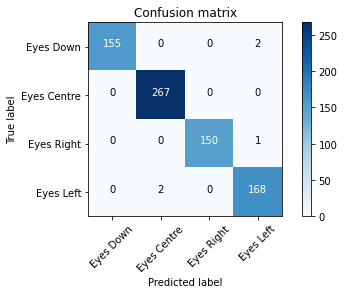

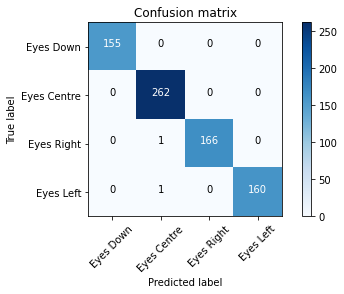

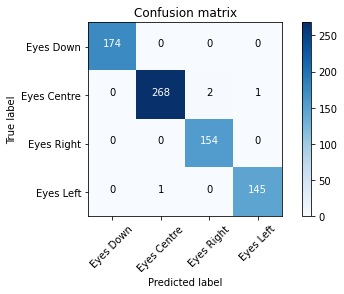

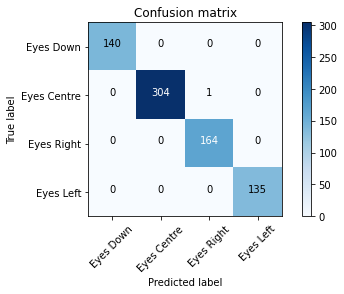

In [20]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]

    for algo, model in rc.items():
        
        yhat = model.predict(X_test)
        print(algo, accuracy_score(y_test, yhat))
        # Compute confusion matrix
        cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2,3])
        np.set_printoptions(precision=2)

        print (classification_report(y_test, yhat))

        # Plot non-normalized confusion matrix
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=['Eyes Down', 'Eyes Centre', 'Eyes Right', 'Eyes Left'],normalize= False,  title='Confusion matrix')


In [21]:
import pickle
with open('iris_states_test_gb.pkl', 'wb') as f:
    pickle.dump(fit_models['gb'], f)